In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orders_export_data=pd.read_csv("Customer segmentation/orders_export.csv")
orders_export_data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#2375,shahadalghannam98@gmail.com,paid,2023-08-07 20:20:51 +0400,unfulfilled,NaN,yes,AED,2790.08,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,rvYmRxzM7JeFC1ypg0xQgcH9F,NaN,NaN,rRXkgUmkxaFogGOv7Cl8PvQge + rvYmRxzM7JeFC1ypg0...
1,#2374,noura.dalle@gmail.com,paid,2023-08-07 00:26:58 +0400,fulfilled,2023-08-07 15:03:56 +0400,yes,AED,3550.00,0.0,...,NaN,NaN,NaN,NaN,Abu Dhabi,Abu Dhabi,rXnwuMFbsVOH67y1sKUTXE5VW,NaN,NaN,rXnwuMFbsVOH67y1sKUTXE5VW
2,#2373,shatha.g22@gmail.com,paid,2023-08-07 00:21:35 +0400,unfulfilled,NaN,yes,AED,2300.88,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,rrLD7M8GU4yQiRZmsYN3Fb0Fg,NaN,NaN,rrLD7M8GU4yQiRZmsYN3Fb0Fg
3,#2372,amal.alsayegh29@gmail.com,paid,2023-08-06 23:30:26 +0400,fulfilled,2023-08-07 15:03:25 +0400,yes,AED,1990.00,0.0,...,NaN,NaN,NaN,NaN,Dubai,Dubai,r3feNTqSAaQQjvLkyG1NS14dV,NaN,NaN,r3feNTqSAaQQjvLkyG1NS14dV
4,#2371,mosh6a@gmail.com,paid,2023-08-06 20:30:00 +0400,fulfilled,2023-08-07 15:02:39 +0400,no,AED,2986.30,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,rDNLLnvkLbikkUXISKCa5Mr7M,NaN,NaN,rDNLLnvkLbikkUXISKCa5Mr7M


In [ ]:
orders_export_data.shape

(1255, 75)

In [ ]:
orders_export_data.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [ ]:
orders_export_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         1255 non-null   object 
 1   Email                        1171 non-null   object 
 2   Financial Status             1038 non-null   object 
 3   Paid at                      804 non-null    object 
 4   Fulfillment Status           1038 non-null   object 
 5   Fulfilled at                 794 non-null    object 
 6   Accepts Marketing            1038 non-null   object 
 7   Currency                     1038 non-null   object 
 8   Subtotal                     1038 non-null   float64
 9   Shipping                     1038 non-null   float64
 10  Taxes                        1038 non-null   float64
 11  Total                        1038 non-null   float64
 12  Discount Code                86 non-null     object 
 13  Discount Amount   

In [ ]:
orders_export_data.isnull().sum()

Name                         0
Email                       84
Financial Status           217
Paid at                    451
Fulfillment Status         217
                          ... 
Shipping Province Name     774
Payment ID                 223
Payment Terms Name        1252
Next Payment Due At       1255
Payment References         223
Length: 75, dtype: int64

In [ ]:
columns_to_exclude = [
    'Tax 2 Name', 'Tax 2 Value', 'Tax 3 Name', 'Tax 3 Value',
    'Tax 4 Name', 'Tax 4 Value', 'Tax 5 Name', 'Tax 5 Value',
    'Lineitem discount', 'Receipt Number', 'Duties', 'Next Payment Due At'
]

# Drop the columns
orders_export_data = orders_export_data.drop(columns=columns_to_exclude)

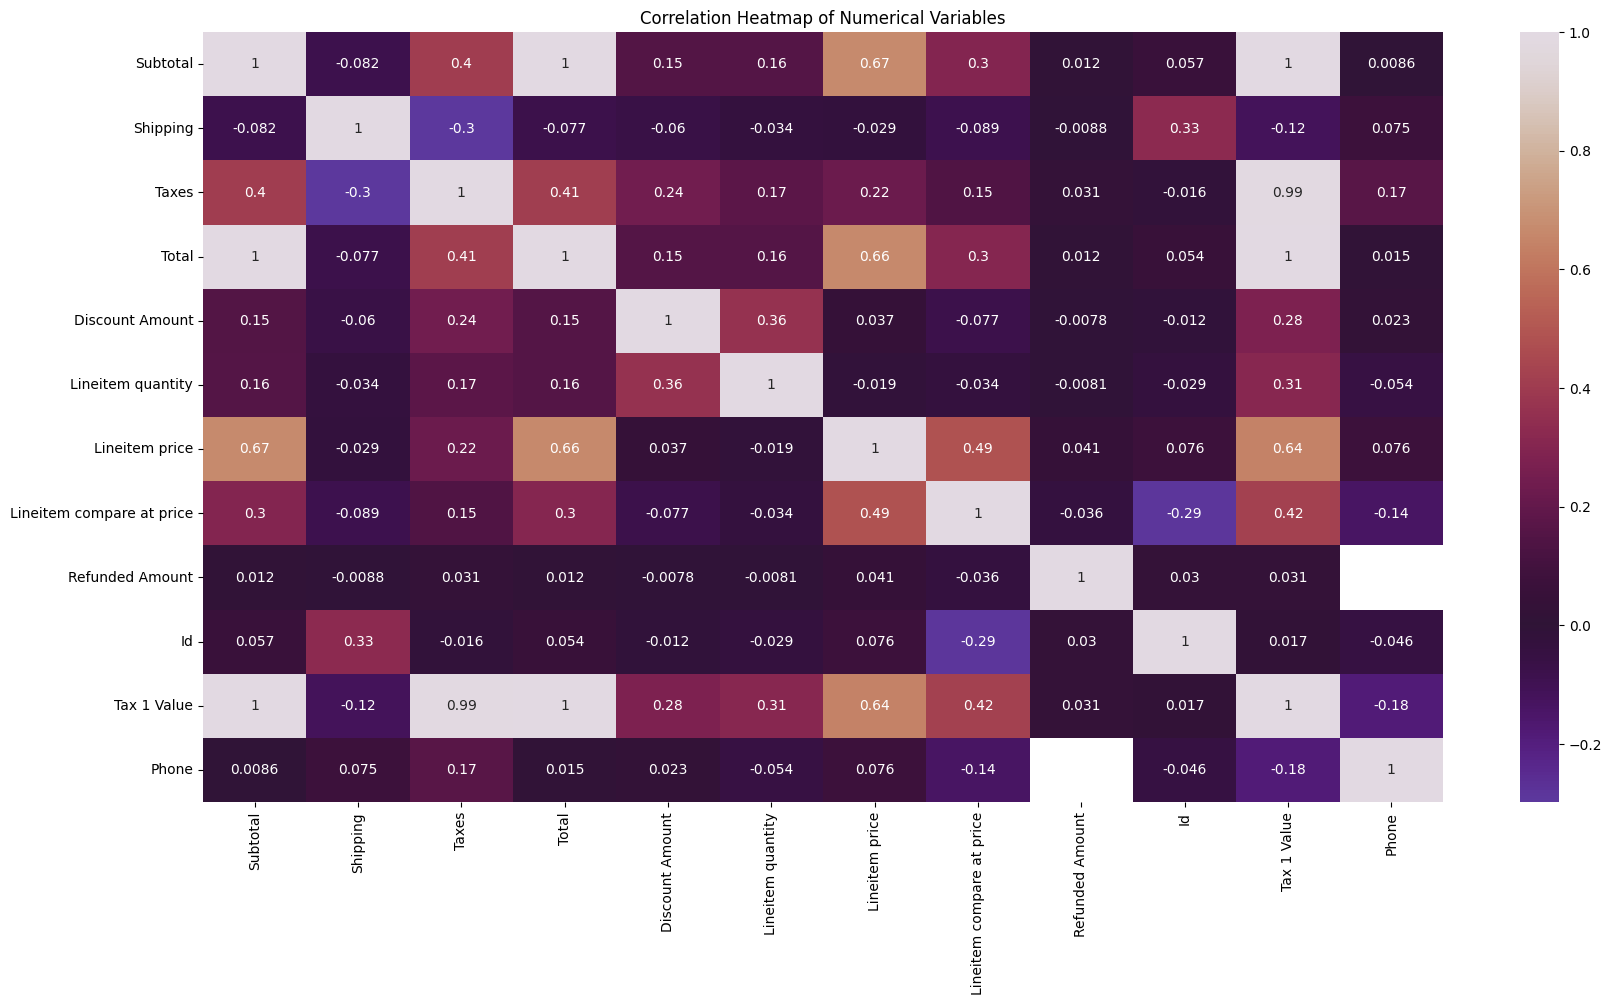

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = orders_export_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**Observation** :
The "Correlation Heatmap of Numerical Variables" provides a visual representation of the correlations between numerical attributes.

Strength of Correlation:

The heatmap color intensity indicates the strength of correlation between pairs of numerical attributes. Darker colors represent stronger correlations (positive or negative), while lighter colors represent weaker or no correlations.

Positive and Negative Correlation:

Positive correlations are indicated by colors moving towards the darker end of the spectrum (towards red), while negative correlations are indicated by colors moving towards the lighter end of the spectrum (towards blue).

Direction of Correlation:

A lighter  cell signifies that as one attribute increases, the other tends to increase as well (positive correlation). A darker blue cell signifies that as one attribute increases, the other tends to decrease (negative correlation).

Correlation Values:

The numerical values within each cell represent the correlation coefficient between the corresponding attributes. These coefficients range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

In [ ]:
orders_export_data.describe ().T.style.set_properties(**{'background-color': '#800000','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Subtotal,1038.000000,3779.819470,4270.590483,0.000000,1950.000000,2700.000000,3960.535000,75450.000000
Shipping,1038.000000,18.560694,32.054764,0.000000,0.000000,0.000000,60.000000,120.000000
Taxes,1038.000000,72.484750,141.019938,0.000000,0.000000,0.000000,107.140000,1822.860000
Total,1038.000000,3815.673921,4278.502053,0.000000,1990.000000,2700.000000,4040.000000,75450.000000
Discount Amount,1038.000000,121.047996,1016.821229,0.000000,0.000000,0.000000,0.000000,21875.000000
Lineitem quantity,1255.000000,1.021514,0.150542,1.000000,1.000000,1.000000,1.000000,3.000000
Lineitem price,1255.000000,3165.737020,2625.390697,0.000000,1825.000000,2360.000000,3950.000000,38250.000000
Lineitem compare at price,214.000000,1094.531916,2083.736248,0.000000,0.000000,0.000000,1650.000000,9200.000000
Refunded Amount,1038.000000,24.769306,333.419416,0.000000,0.000000,0.000000,0.000000,6025.000000
Id,1038.000000,4464299466069.437500,507300790920.671448,3007490031770.000000,4299370881178.000000,4533762670746.000000,4876401615002.000000,5063055769754.000000


<ipython-input-41-9dba6f0eabfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = abs(orders_export_data.corr()['Lineitem price']).sort_values()[:-1]


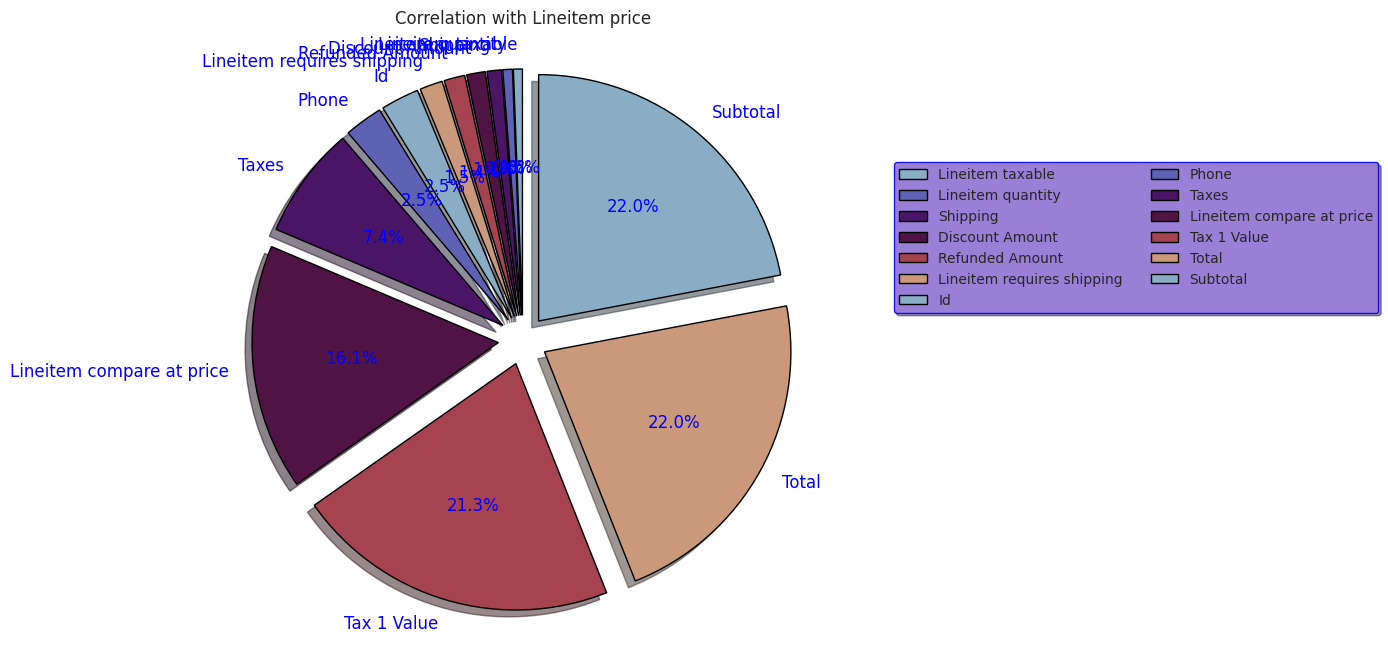

In [ ]:
correlation_data = abs(orders_export_data.corr()['Lineitem price']).sort_values()[:-1]

# Plot a pie chart
plt.figure(figsize=(8, 8))
pct = [0.1] * len(correlation_data)  # Equal explode values for each slice
textprops = {'color': "blue", "fontsize": 12}
wedgeprops = {'edgecolor': "black", 'linewidth': 1, 'antialiased': True}
correlation_data.plot.pie(explode=pct, autopct="%2.1f%%", shadow=True, startangle=90,
                         wedgeprops=wedgeprops, textprops=textprops)
plt.axis("off")
plt.title("Correlation with Lineitem price")

plt.legend(bbox_to_anchor=(1.9,0.8),ncol=2,facecolor="#9B7DDE",framealpha=0.9,shadow=True,edgecolor="blue",fancybox=True)
plt.show()

**Observation**:
The "Correlation with Lineitem price" pie chart provides information about the correlation between various attributes and the "Lineitem price" attribute .

Attributes with Higher Positive Correlation:

The larger segments of the pie chart represent attributes that have a higher positive correlation with the "Lineitem price." These attributes have a stronger linear relationship with the "Lineitem price" and tend to increase or decrease in conjunction with changes in the price.

Attributes with Lower Positive Correlation:

The smaller segments of the pie chart represent attributes with a lower positive correlation with the "Lineitem price." While they still have a positive correlation, the relationship is not as strong as with the larger segments.

Attributes with Negative Correlation:

There are no negative correlation segments in the pie chart. This suggests that none of the attributes in the dataset have a strong negative linear relationship with the "Lineitem price."

Correlation Strength:

The size of each segment corresponds to the strength of the correlation between the attribute and the "Lineitem price." Larger segments indicate attributes with a higher correlation strength.

Correlation Magnitude:

The percentage value displayed inside each segment represents the magnitude of the correlation coefficient. This provides a quantitative measure of the strength of the correlation between each attribute and the "Lineitem price."

Attribute Importance:

The attributes represented by larger segments are more influential in affecting changes in the "Lineitem price." Attributes with higher positive correlation can potentially be used to predict or explain variations in the price.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


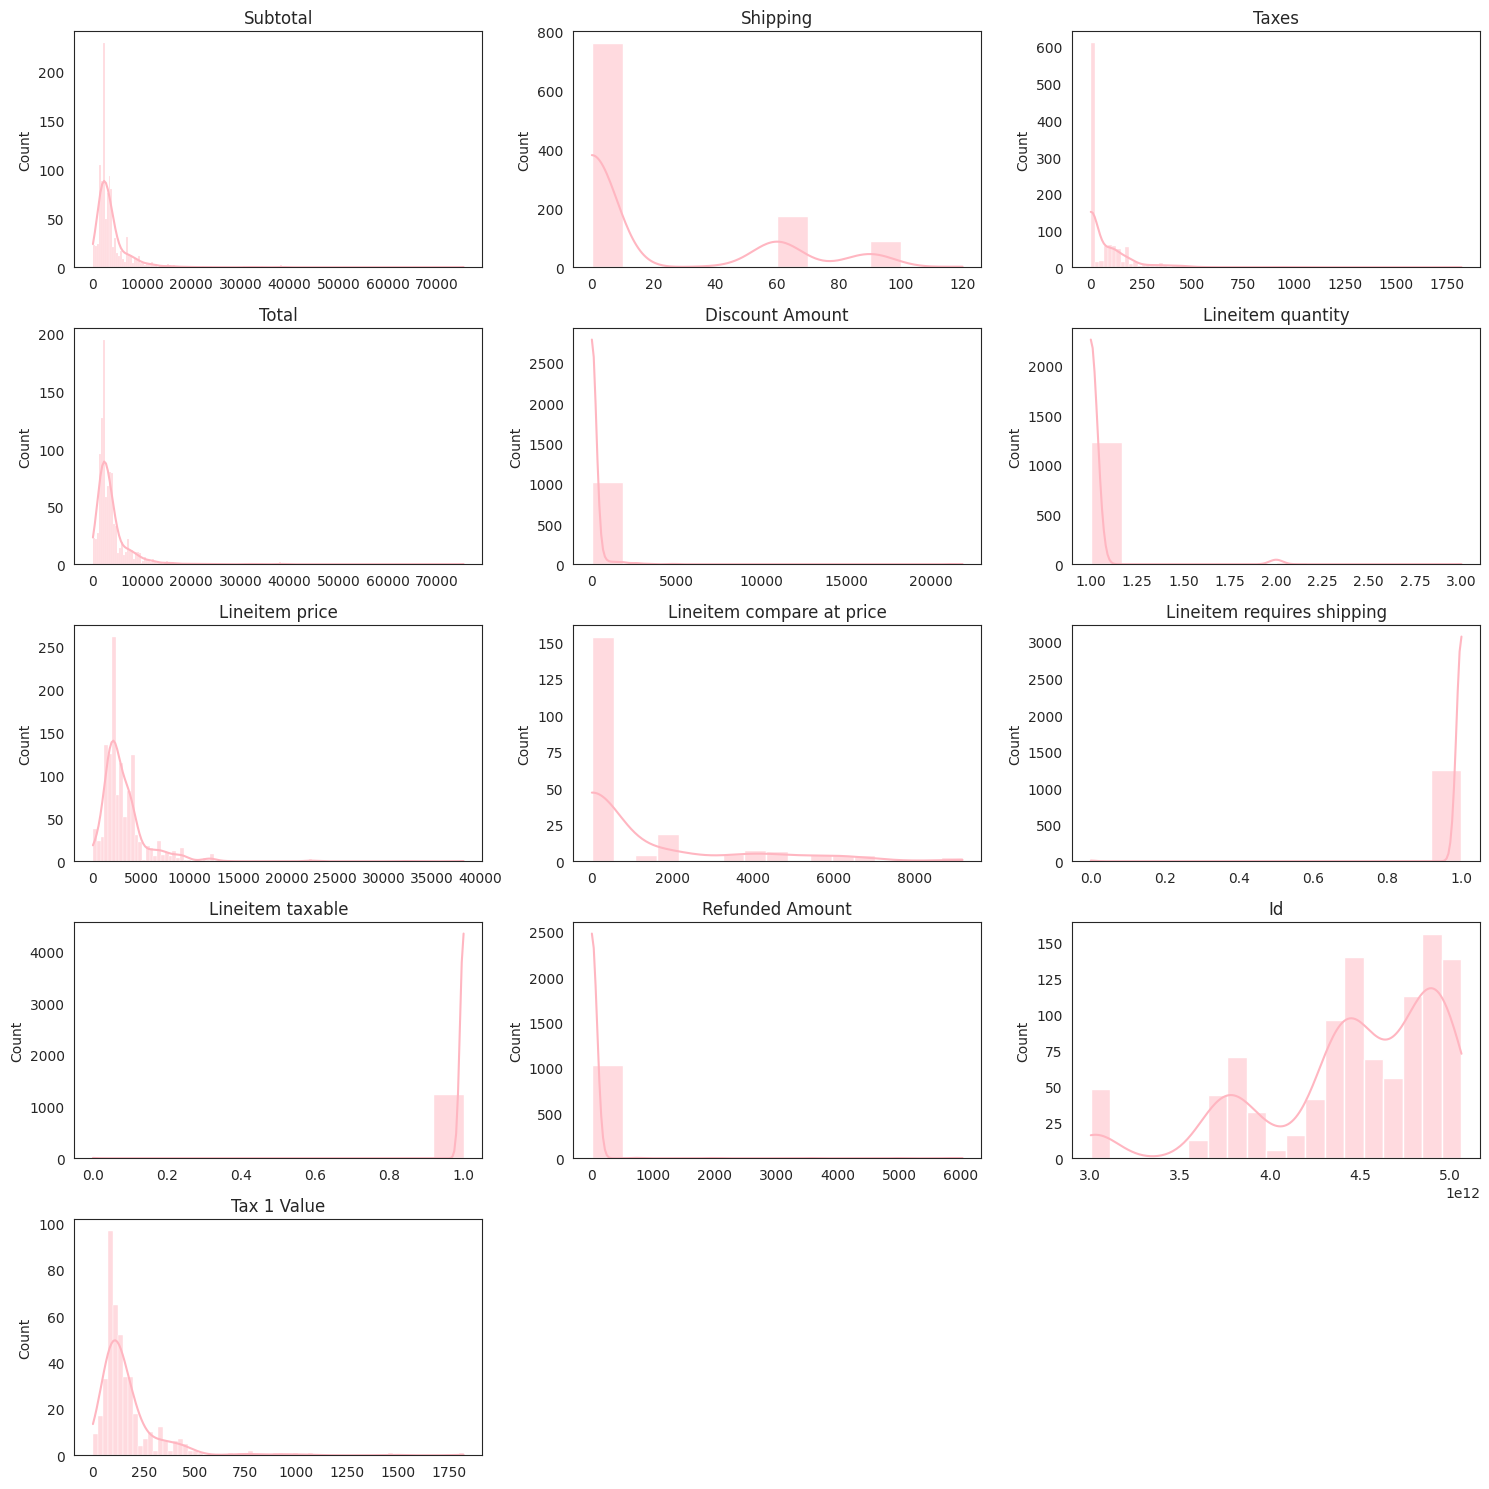

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Define the number of columns per row in the subplot grid
n = 3

# Select the columns you want to plot
selected_columns = [
    'Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Amount',
    'Lineitem quantity', 'Lineitem price', 'Lineitem compare at price',
    'Lineitem requires shipping', 'Lineitem taxable', 'Refunded Amount',
    'Id', 'Tax 1 Value'
]

# Calculate the number of rows needed for the subplot grid
num_rows = math.ceil(len(selected_columns) / n)

# Set the figure size based on the number of rows and columns
plt.figure(figsize=[15, 3 * num_rows])

# Create subplots
for c in range(len(selected_columns)):
    plt.subplot(num_rows, n, c + 1)
    if orders_export_data[selected_columns[c]].dtype != 'object':
        sns.histplot(data=orders_export_data, x=selected_columns[c], kde=True,color='#FFB6C1')  # Drop NaN values before plotting
        plt.title(selected_columns[c])
        plt.xlabel('')  # Remove x-label for better visualization

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


**Observation**:

Distribution Shape:

The histograms display the shape of the distribution for each selected numerical variable.
You can observe whether the distribution is symmetric (normal), skewed to the left (negatively skewed), or skewed to the right (positively skewed).

Central Tendency:

The position of the peak in the histogram indicates the central tendency of the distribution, such as the mean or median.

Spread and Variability:

The width and spread of the distribution provide information about the variability of the data.
Narrow distributions have lower variability, while wider distributions have higher variability.

Outliers:

Outliers, if present, can be identified as data points that fall far from the main bulk of the distribution.
You can detect potential outliers by observing data points that are isolated from the main cluster.

Skewness:

The direction and degree of skewness can be determined from the histogram shape.
Positive skewness indicates a tail extending to the right, while negative skewness indicates a tail extending to the left.

Kurtosis:

The height and sharpness of the peak in the histogram give an indication of the kurtosis (peakedness) of the distribution.
High kurtosis indicates a more peaked distribution, while low kurtosis indicates a flatter distribution.

Bimodality and Multimodality:

Multiple peaks in the histogram suggest bimodal or multimodal distributions, where the data may have multiple modes or clusters.

Data Ranges:

The x-axis of each histogram shows the range of values for the selected numerical variable.

Normality and Transformations:

Histograms help identify whether the data follows a normal distribution.
Deviations from normality can guide decisions about applying data transformations.

Data Characteristics:

You can gather insights into the inherent characteristics of the selected numerical variables, such as order amounts, quantities, taxes, etc.

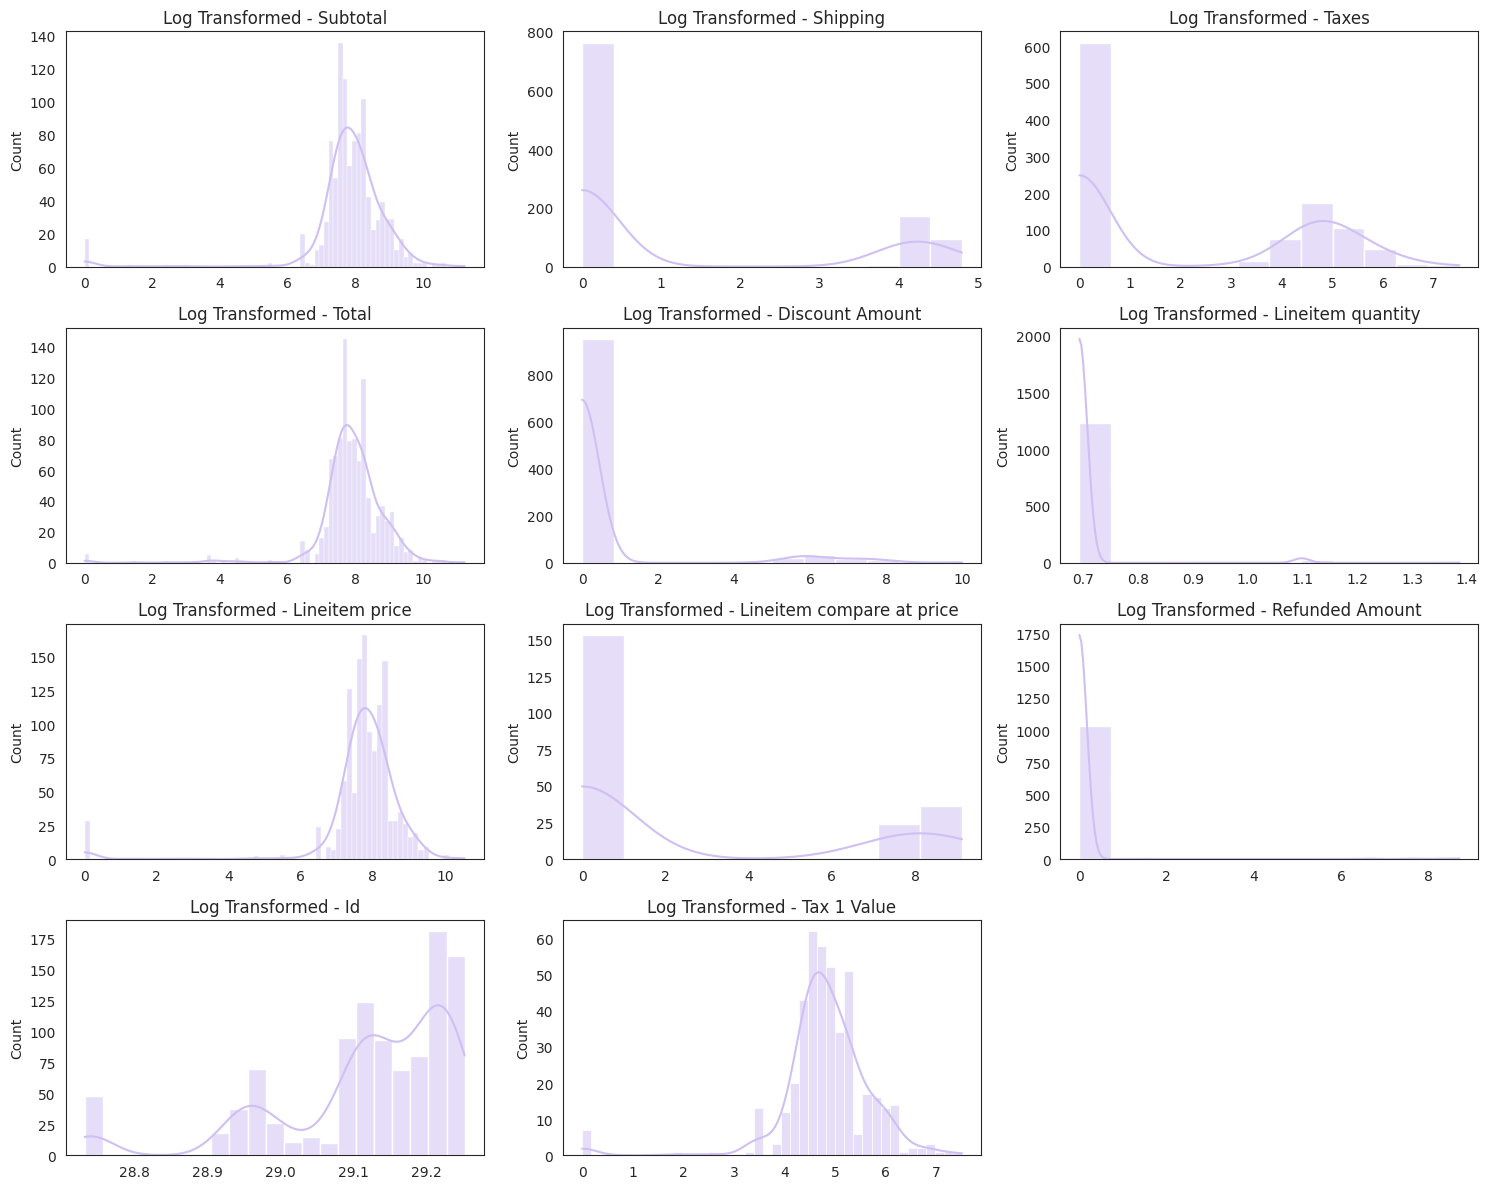

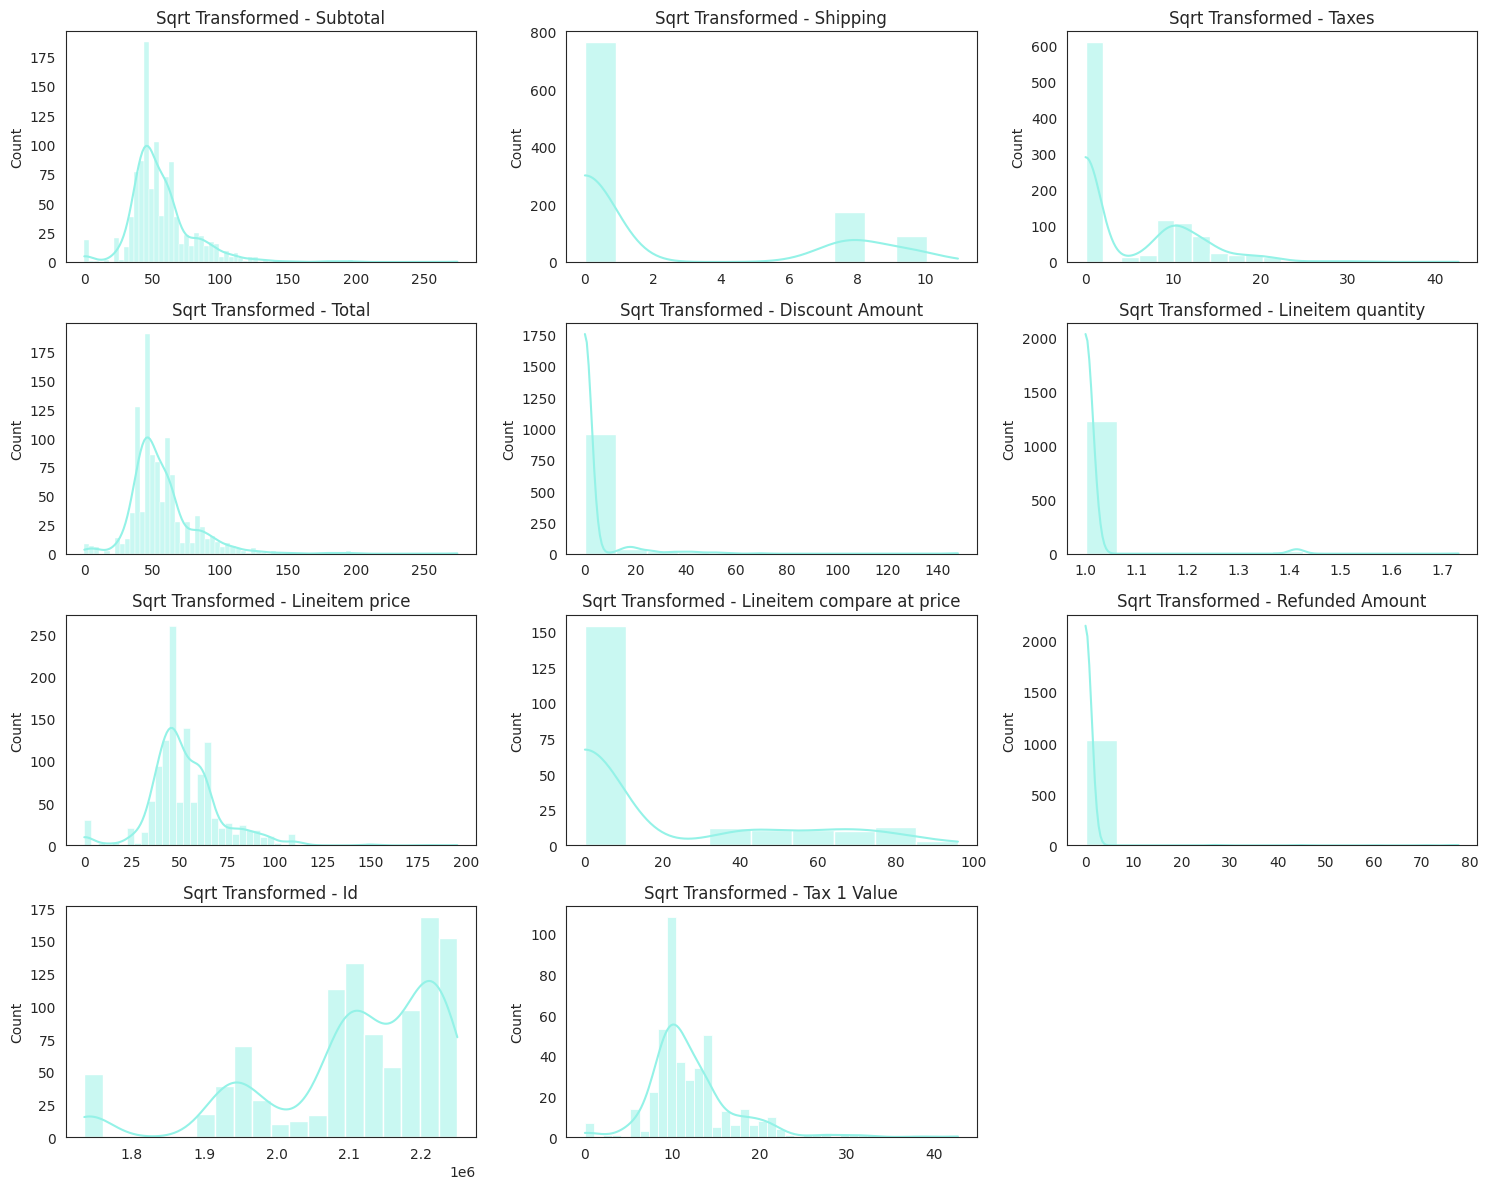

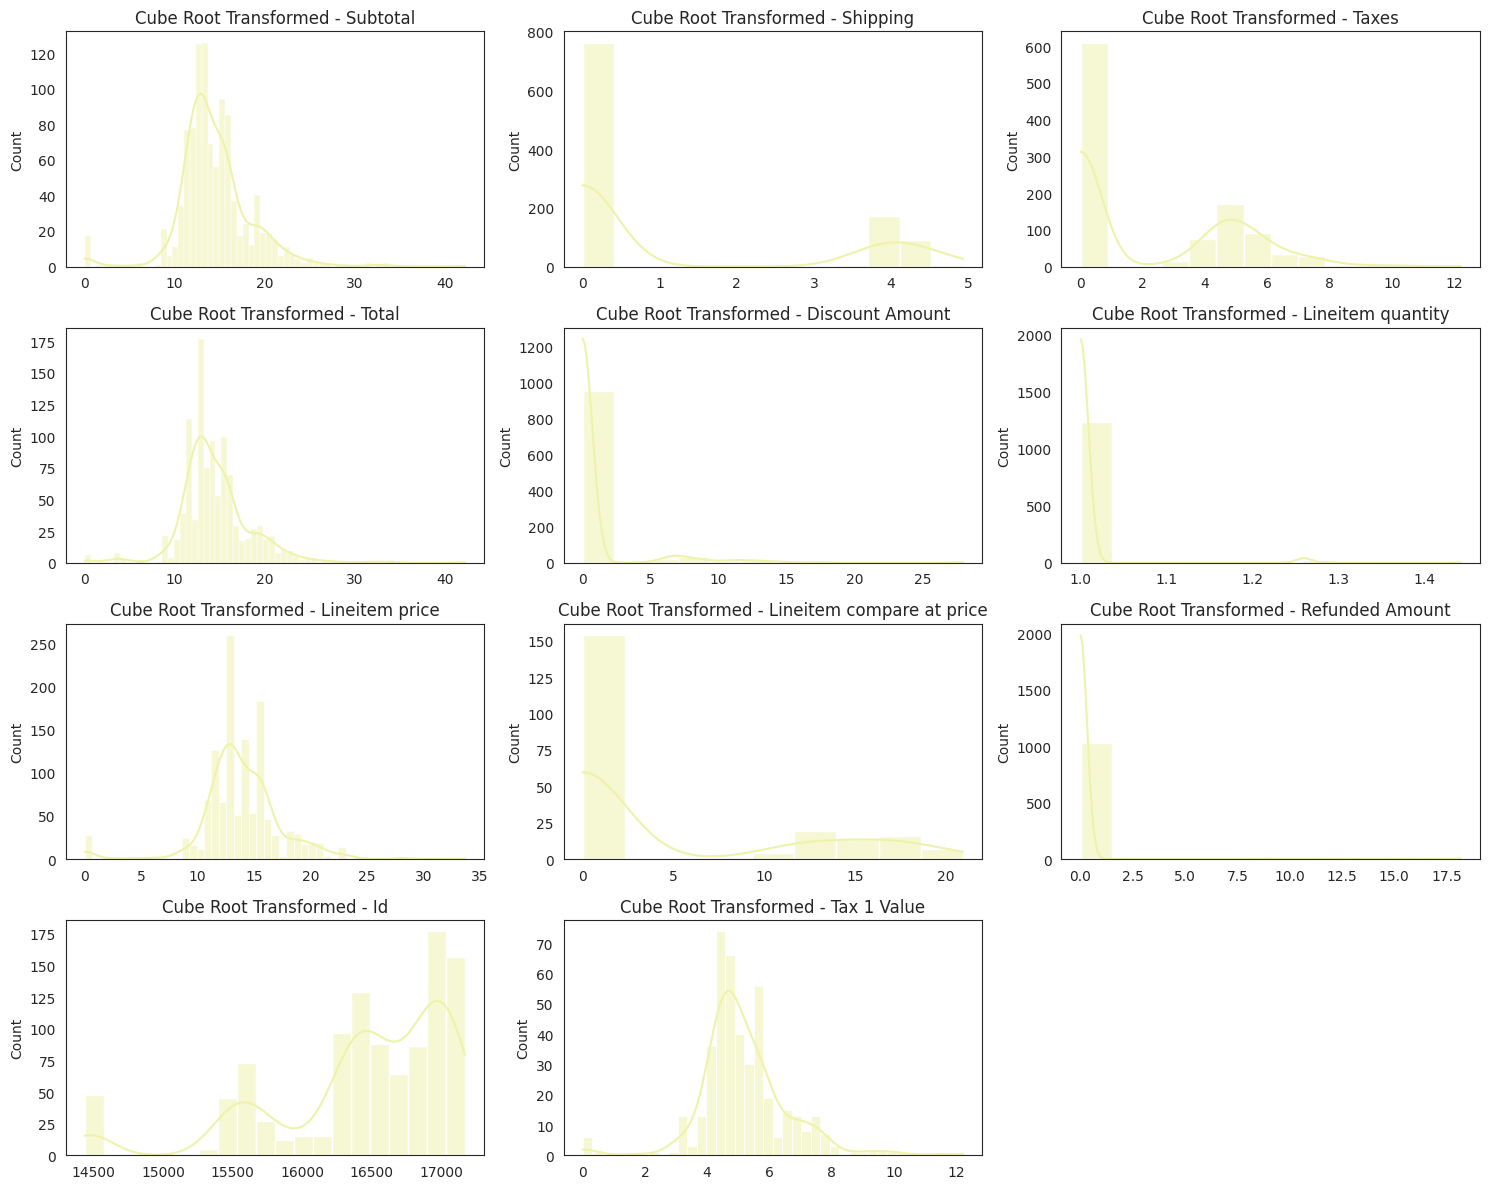

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

# Define the number of columns per row in the subplot grid
n = 3

# Select the numerical columns you want to transform
numerical_columns = [
    'Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Amount',
    'Lineitem quantity', 'Lineitem price', 'Lineitem compare at price',
    'Refunded Amount', 'Id', 'Tax 1 Value'
]

# Calculate the number of rows needed for the subplot grid
num_rows = math.ceil(len(numerical_columns) / n)

# Set the figure size based on the number of rows and columns
plt.figure(figsize=[15, 3 * num_rows])

# Create subplots for Log, Sqrt, and Cube Root transformations
for c in range(len(numerical_columns)):
    plt.subplot(num_rows, n, c + 1)

    # Log Transformation
    log_transformed = np.log(orders_export_data[numerical_columns[c]] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_transformed, kde=True,color='#CFBFF3')
    plt.title('Log Transformed - {}'.format(numerical_columns[c]))
    plt.xlabel('')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 3 * num_rows])

for c in range(len(numerical_columns)):
    plt.subplot(num_rows, n, c + 1)

    # Square Root Transformation
    sqrt_transformed = np.sqrt(orders_export_data[numerical_columns[c]])
    sns.histplot(sqrt_transformed, kde=True,color='#94F2E7')
    plt.title('Sqrt Transformed - {}'.format(numerical_columns[c]))
    plt.xlabel('')

plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 3 * num_rows])

for c in range(len(numerical_columns)):
    plt.subplot(num_rows, n, c + 1)

    # Cube Root Transformation
    cube_root_transformed = np.cbrt(orders_export_data[numerical_columns[c]])
    sns.histplot(cube_root_transformed, kde=True,color='#EEF3AA')
    plt.title('Cube Root Transformed - {}'.format(numerical_columns[c]))
    plt.xlabel('')

plt.tight_layout()
plt.show()


**Observation**:

Log Transformation Histograms:

The first set of histograms displays the distributions of numerical variables after applying the Log transformation.
Log transformations can help address skewed distributions and compress the range of values for variables that exhibit exponential growth.
Variables with high positive skewness in their original distribution may have a more symmetrical distribution after the Log transformation.

Square Root Transformation Histograms:

The second set of histograms shows the distributions after applying the Square Root transformation.
Square Root transformations are useful for addressing positive skewness and handling data with square-root relationships.

Cube Root Transformation Histograms:

The third set of histograms presents the distributions after applying the Cube Root transformation.
Cube Root transformations are effective for handling variables with cube-root relationships and mitigating the impact of outliers.

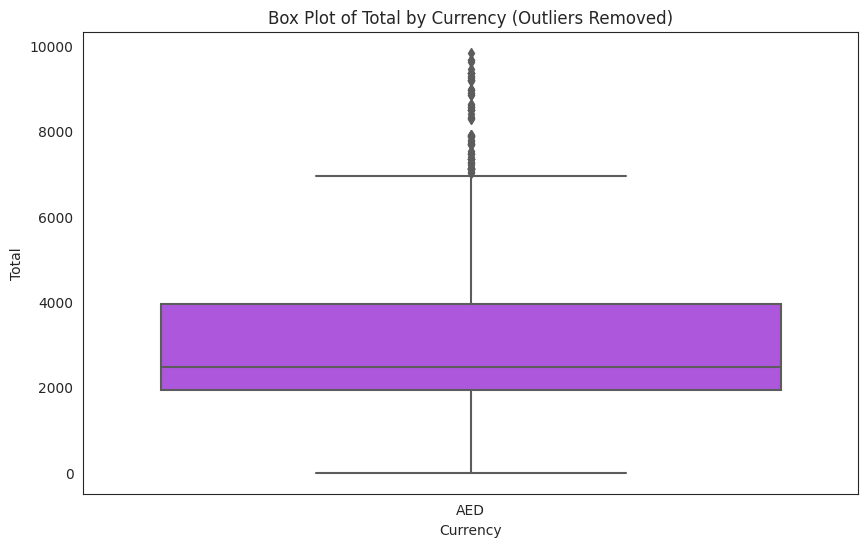

In [ ]:
plt.figure(figsize=(10, 6))

# Filter the data to remove outliers above 30000
filtered_data = orders_export_data[orders_export_data['Total'] <= 10000]

sns.boxplot(data=filtered_data, x='Currency', y='Total',color="#B241F2")
plt.title('Box Plot of Total by Currency (Outliers Removed)')
plt.xlabel('Currency')
plt.ylabel('Total')
plt.show()


**Observation**:

Currency (Max, Min, Median, and IQR):
The maximum total order value is around 7000, and the minimum value is 0.
The median (50th percentile) total order value is approximately between 2000 and 4000.
The interquartile range (IQR) spans between the lower and upper quartiles and encompasses the middle 50% of the data.

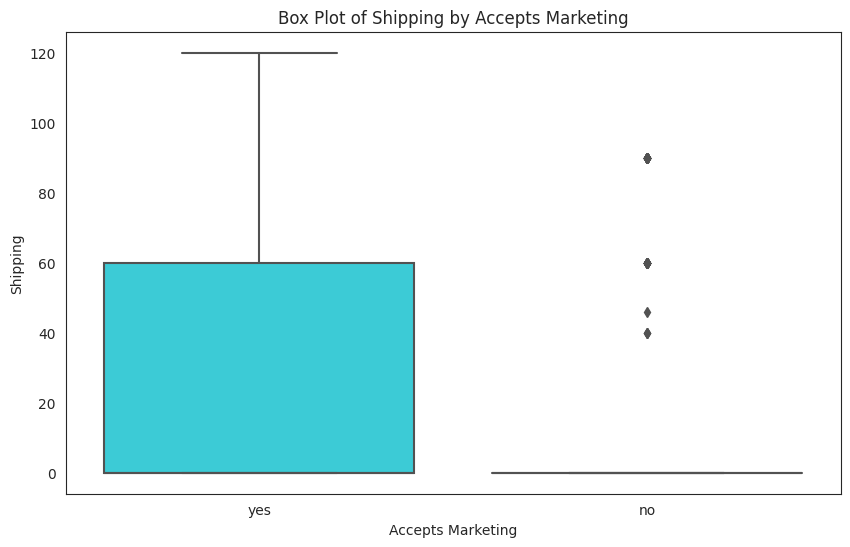

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_export_data, x='Accepts Marketing', y='Shipping',color="#22E1F0")
plt.title('Box Plot of Shipping by Accepts Marketing')
plt.xlabel('Accepts Marketing')
plt.ylabel('Shipping')
plt.show()


**Observation**:

Accepts Marketing = Yes:

The distribution of shipping values for customers who accept marketing communications is concentrated within a narrower range, with the majority of values between 0 and 60. This indicates that these customers tend to have consistent shipping costs.

Accepts Marketing = No:

The absence of a visible observation suggests that the distribution of shipping values for customers who do not accept marketing communications might be highly skewed or concentrated at certain values. Further investigation is needed to understand this distribution.

Addressing Outliers:

For the "No" category, the presence of outliers between 40 and 100 may indicate unusual or exceptional cases. Investigate these outliers to determine whether they are valid data points or anomalies that need attention.

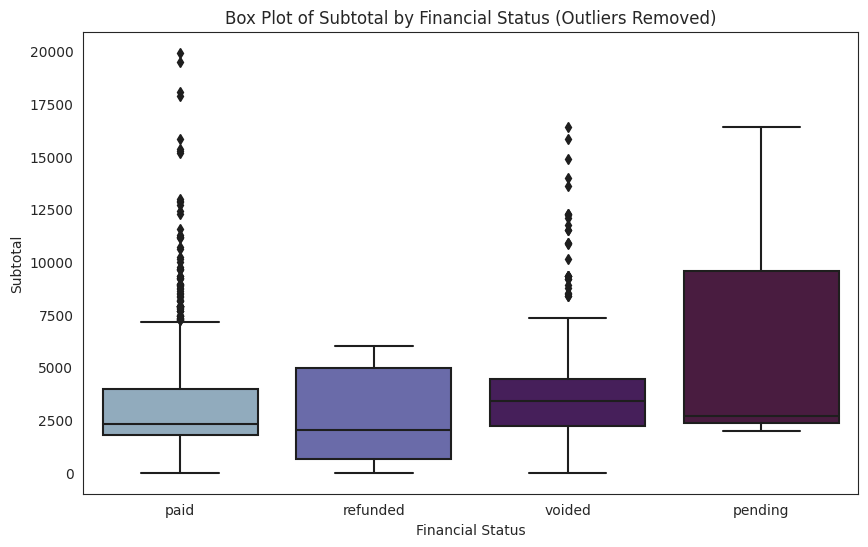

In [ ]:
plt.figure(figsize=(10, 6))

# Filter the data to remove outliers above 20000
filtered_data = orders_export_data[orders_export_data['Subtotal'] <= 20000]

sns.boxplot(data=filtered_data, x='Financial Status', y='Subtotal')
plt.title('Box Plot of Subtotal by Financial Status (Outliers Removed)')
plt.xlabel('Financial Status')
plt.ylabel('Subtotal')
plt.show()


**observations** :

Paid Category:

The data in the "Paid" category is well-distributed, with a median around 2500. This suggests that a significant portion of customers are making purchases within the range of 2000 to 4000. To encourage higher average order values, consider introducing tiered discounts, bundle offers, or loyalty programs.

Voided Category:

The "Voided" category's distribution is similar to the "Paid" category, indicating that customers who eventually voided their orders had similar purchase behavior. Analyze the reasons for voiding and consider offering incentives or addressing any issues that lead to voided orders.

Refunded Category:

The "Refunded" category shows variability, with a wider IQR. Identify the characteristics of orders that result in refunds. Consider optimizing the refund process and ensuring product quality and accurate descriptions to reduce refund occurrences.

Pending Category:

The "Pending" category exhibits a broader range of subtotals. Focus on reducing the variability within this category by expediting order processing, ensuring timely communication, and addressing potential issues that cause longer order processing times.

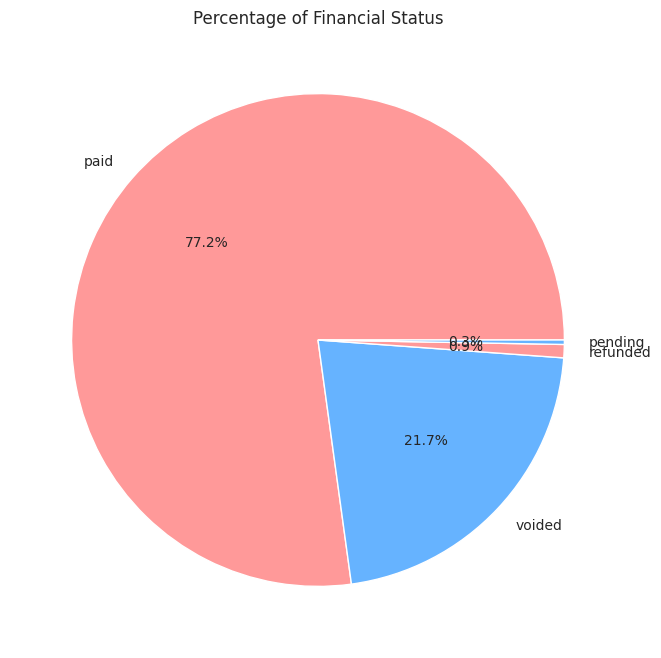

In [ ]:
plt.figure(figsize=(8, 8))
financial_status_counts = orders_export_data['Financial Status'].value_counts()
plt.pie(financial_status_counts, labels=financial_status_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Financial Status')
plt.show()


**observations**:

Paid Orders - 77.2%:

The majority of orders, comprising 77.2% of the total, are categorized as "Paid."
This suggests that a significant portion of customers are successfully completing transactions and paying for their orders, reflecting a healthy revenue stream.

Voided Orders - 21.7%:

About 21.7% of orders fall under the "Voided" category.
Voided orders might represent cases where transactions were initiated but subsequently voided before completion, possibly due to customer changes or cancellations.

Refunded and Pending Orders - Small Percentages:

The percentages of orders categorized as "Refunded" and "Pending" are relatively small compared to "Paid" and "Voided" orders.
"Refunded" orders might represent cases where customers requested refunds for completed orders, while "Pending" orders might indicate orders that are awaiting further processing or verification.

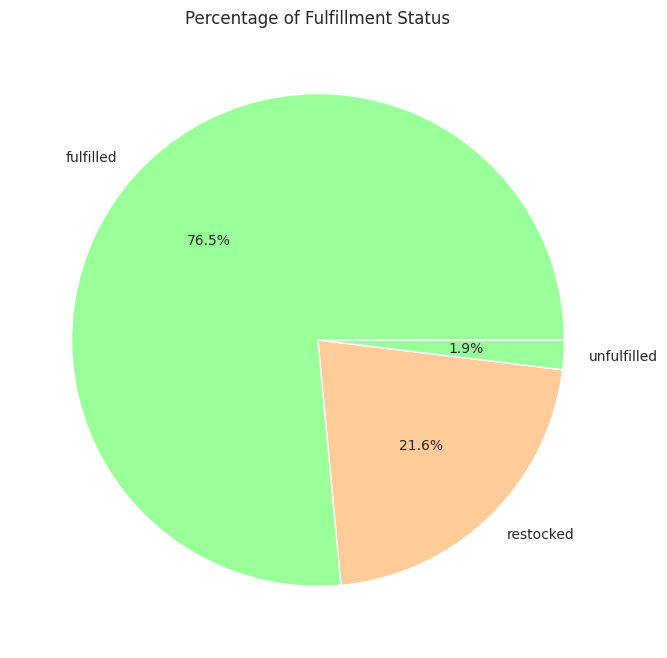

In [ ]:
plt.figure(figsize=(8, 8))
fulfillment_status_counts = orders_export_data['Fulfillment Status'].value_counts()
plt.pie(fulfillment_status_counts, labels=fulfillment_status_counts.index, autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
plt.title('Percentage of Fulfillment Status')
plt.show()


**observations**:

Fulfilled Orders - 76.5%:

The majority of orders, comprising 76.5% of the total, are classified as "Fulfilled."
This suggests that the business is successful in fulfilling a significant portion of customer orders, which is a positive indication of operational efficiency and customer satisfaction.

Restocked Orders - 21.6%:

About 21.6% of orders fall under the "Restocked" category.
This indicates that a notable portion of orders might initially be out of stock but are subsequently restocked and fulfilled.

Unfulfilled Orders - 1.9%:

Only a small portion, approximately 1.9% of orders, are categorized as "Unfulfilled."
This implies that a very limited number of orders face issues in being fulfilled due to various factors.

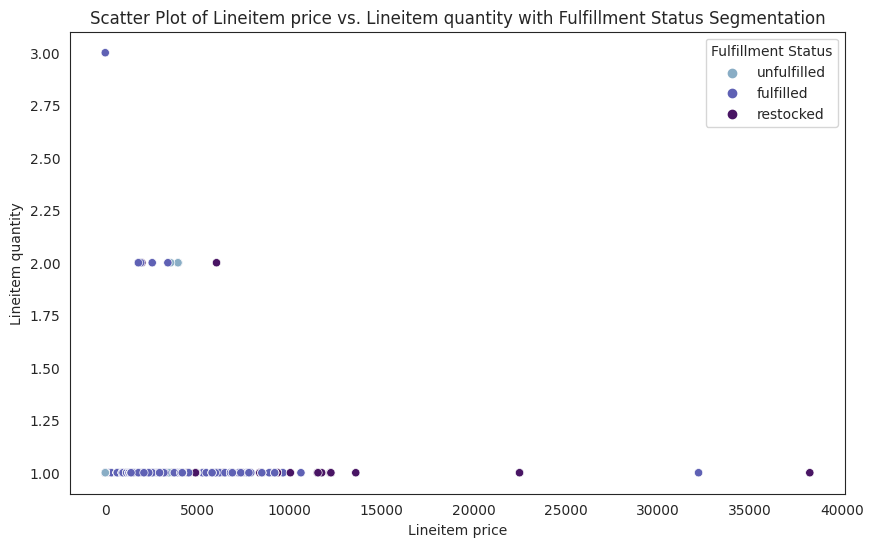

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_export_data, x='Lineitem price', y='Lineitem quantity', hue='Fulfillment Status')
plt.title('Scatter Plot of Lineitem price vs. Lineitem quantity with Fulfillment Status Segmentation')
plt.xlabel('Lineitem price')
plt.ylabel('Lineitem quantity')
plt.legend(title='Fulfillment Status')
plt.show()


**observations**:

Unfulfilled Category - Lineitem Quantity and Price:

In the "Unfulfilled" category, items with "Lineitem quantity" at 2 and 1 are frequently observed.
The "Lineitem price" for unfulfilled orders is mostly in the range of 0 to 5000.

Fulfilled Category - Lineitem Quantity and Price:

In the "Fulfilled" category, items with "Lineitem quantity" at 2 and 1 are commonly observed, and items with "Lineitem quantity" at 3 are also present.
The "Lineitem price" for fulfilled orders is primarily in the range of 0 to 10000, with occasional instances between 30000 and 35000.

Restocked Category - Lineitem Quantity and Price:

In the "Restocked" category, items with "Lineitem quantity" at 2 and 1 are frequently observed.
The "Lineitem price" for restocked orders is mainly in the range of 0 to 15000, with occasional instances between 20000 and 40000.

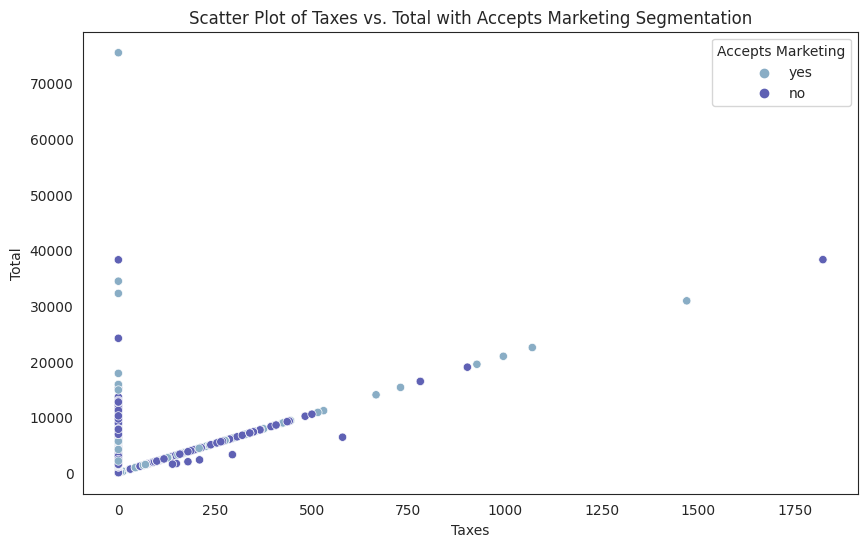

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_export_data, x='Taxes', y='Total', hue='Accepts Marketing')
plt.title('Scatter Plot of Taxes vs. Total with Accepts Marketing Segmentation')
plt.xlabel('Taxes')
plt.ylabel('Total')
plt.legend(title='Accepts Marketing')
plt.show()


**observations**:

Accepts Marketing = Yes - Total vs. Taxes:

In the "Accepts Marketing = Yes" category, the total order value (y-axis) reaches above 70000 when taxes are zero.
This suggests that customers who have accepted marketing communications may be more likely to make high-value purchases (above 70000) when taxes are not applicable (zero taxes).

Accepts Marketing = No - Total vs. Taxes:

In the "Accepts Marketing = No" category, the total order value (y-axis) reaches between 30000 and 40000 when taxes are above 1750.
This indicates that customers who have not accepted marketing communications may still make moderate-value purchases (between 30000 and 40000) even when taxes are relatively high (above 1750).

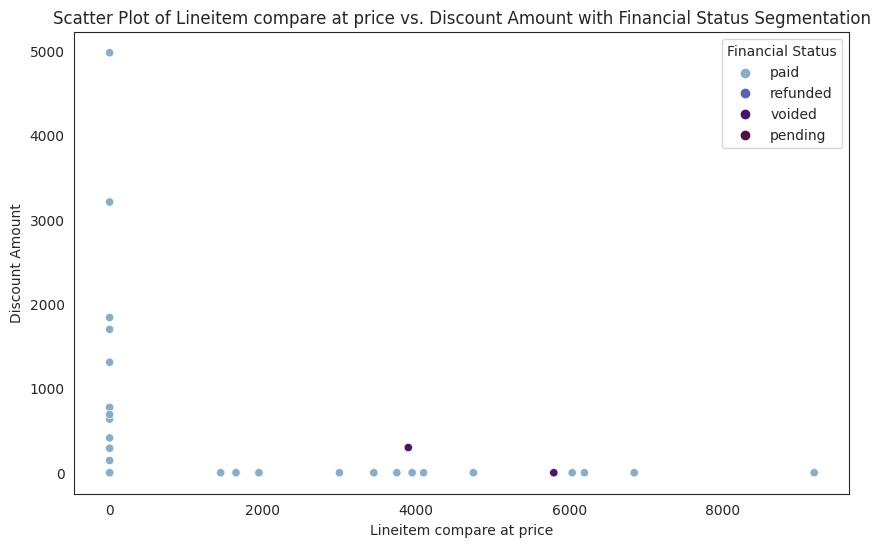

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_export_data, x='Lineitem compare at price', y='Discount Amount', hue='Financial Status')
plt.title('Scatter Plot of Lineitem compare at price vs. Discount Amount with Financial Status Segmentation')
plt.xlabel('Lineitem compare at price')
plt.ylabel('Discount Amount')
plt.legend(title='Financial Status')
plt.show()


**observations**:

Paid Category - High Lineitem Compare at Price with Low Discount Amount:

In the "Paid" category, products with higher "Lineitem compare at price" values (above 8000) often have low or no discount amounts (around 0).
This suggests that customers who make paid purchases are willing to pay closer to the original price for high-value items without requiring significant discounts.

Paid Category - Lineitem Compare at Price and Zero Discount Amount:

The "Paid" category also exhibits a trend where products with "Lineitem compare at price" values at zero discount amount tend to reach around 5000.
This might indicate that even without a direct discount, customers are willing to pay a certain amount below the original price.
Void and Pending Categories:

The "Void" and "Pending" categories are not distinctly visible in the graph, possibly indicating that these categories have relatively fewer data points or a different distribution pattern.
Further investigation is needed to understand the behavior of these categories in relation to "Lineitem compare at price" and "Discount Amount."

Refund Category - Specific Price Points:

The "Refund" category often appears at specific "Lineitem compare at price" points, such as 4000, 6000, and below 1000 discount amount.
This could suggest that certain products within these price ranges are commonly associated with refunds, possibly due to customer dissatisfaction or product quality issues.

<ipython-input-70-47f577c86e36>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_export_data, x='Fulfillment Status', y='Total', ci=None)


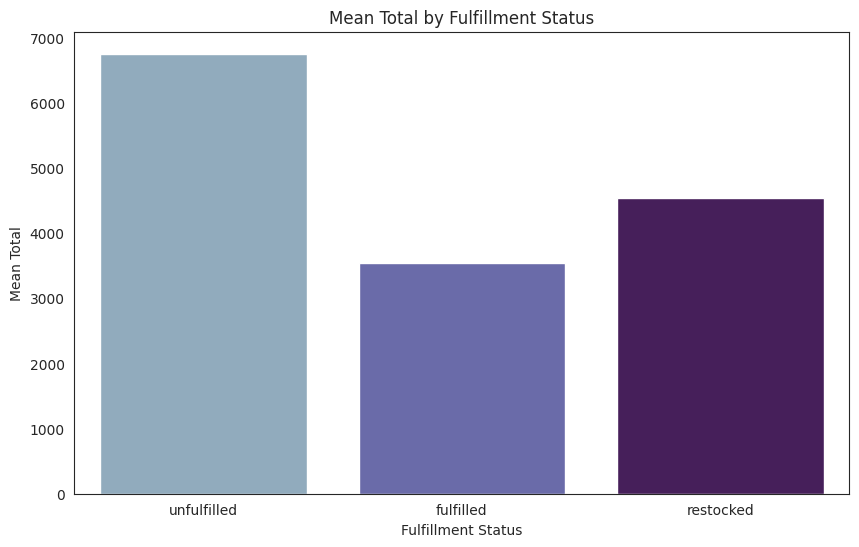

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_export_data, x='Fulfillment Status', y='Total', ci=None)
plt.title('Mean Total by Fulfillment Status')
plt.xlabel('Fulfillment Status')
plt.ylabel('Mean Total')
plt.show()


**Observations**:

High Mean Total for Unfulfilled Orders:

Customers with unfulfilled orders have the highest mean total. This could indicate that some high-value orders are not being fulfilled promptly.
Customers may be impatient or dissatisfied with delays in receiving their orders.

Mean Total for Restocked Orders:

"Restocked" orders having a relatively high mean total may suggest that these customers are willing to re-order products that were previously out of stock.

In [ ]:
# Aggregate data by Email for feature engineering
grouped_data = orders_export_data.groupby('Email').agg({
    'Subtotal': ['count', 'mean'],
    'Accepts Marketing': lambda x: int('yes' in x.values),
    'Source': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()
grouped_data.columns = ['Email', 'Total Orders', 'Average Order Value', 'Accepts Marketing', 'Most Common Source']

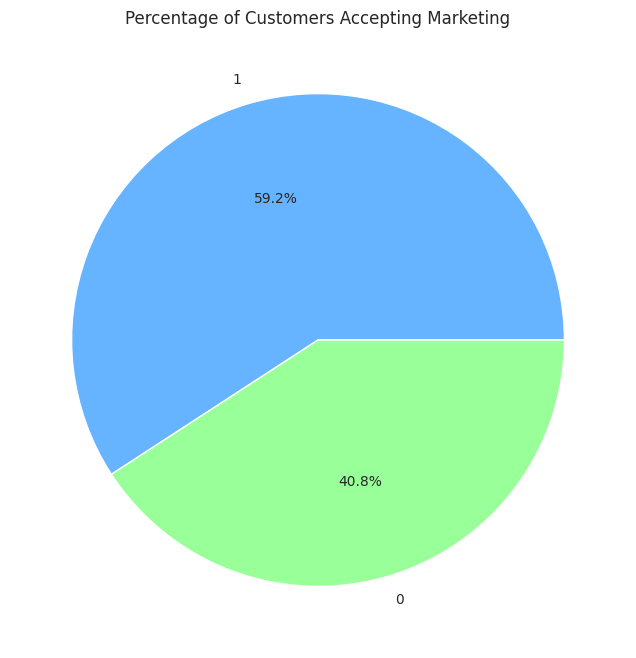

In [ ]:
plt.figure(figsize=(8, 8))
accepts_marketing_counts = grouped_data['Accepts Marketing'].value_counts()
plt.pie(accepts_marketing_counts, labels=accepts_marketing_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Percentage of Customers Accepting Marketing')
plt.show()


**Observations**:
Engagement with Marketing:
Cluster 1 customers are more receptive to accepting marketing communications, indicating a higher level of engagement with your marketing efforts.
Cluster 0 customers have a lower percentage of acceptance, suggesting that they might be more cautious or less interested in receiving marketing communications.

<ipython-input-77-4a608c8483ef>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='Most Common Source', y='Total Orders', ci=None)


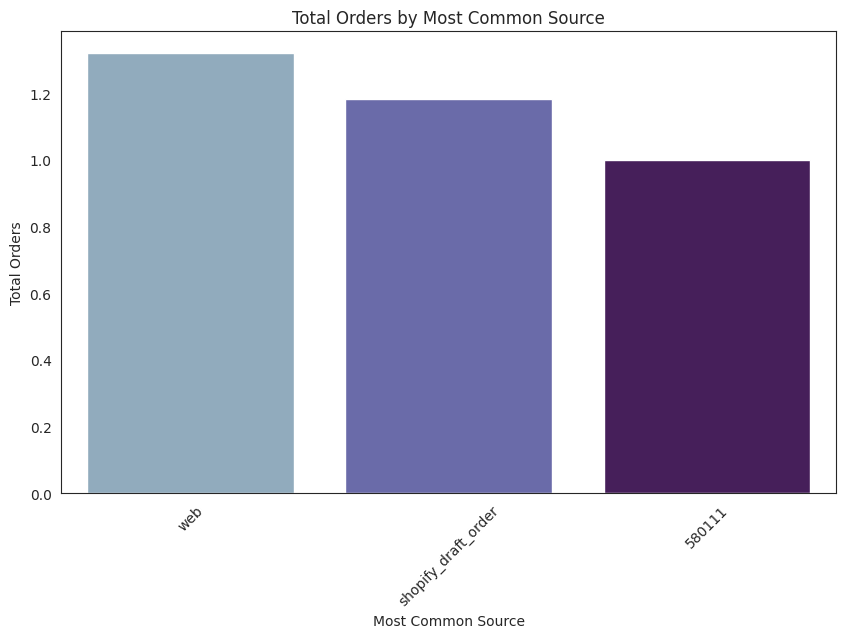

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Most Common Source', y='Total Orders', ci=None)
plt.title('Total Orders by Most Common Source')
plt.xlabel('Most Common Source')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


**Observations**:
**Web Dominance**: The fact that "web" is the most common source indicates that your online store is the primary channel for customer orders. This could imply strong brand visibility, user engagement, and successful online marketing efforts.

**Draft Orders Significance**: The presence of "shopify draft order" as a significant source suggests that your internal sales or admin team might be processing orders manually, possibly for phone or offline orders, custom orders, or other special cases.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
cluster_data = grouped_data[['Total Orders', 'Average Order Value']]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform Agglomerative Clustering
n_clusters = 5  # Number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
grouped_data['Cluster'] = clustering.fit_predict(cluster_data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


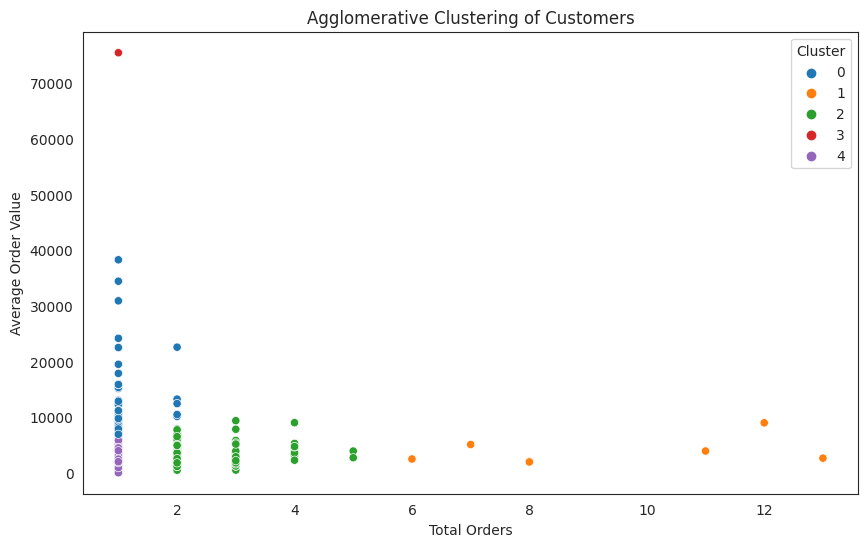

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='Total Orders', y='Average Order Value', hue='Cluster', palette='tab10')
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Total Orders')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.show()


**Observation:**

**Cluster 0:**

Customers with relatively low total orders (0 to 2) and average order value (up to 40000).
This cluster might consist of new or occasional customers who make small purchases.
**Strategy:** Focus on nurturing and converting these customers into more frequent buyers. Offer incentives, discounts, or promotions for larger orders.

**Cluster 1:**

Customers with moderate total orders (6 to 13) and average order value (up to 20000).
This cluster represents customers who make regular purchases but with relatively lower average order values.
**Strategy**: Encourage these customers to increase their average order value through cross-selling and upselling. Offer product bundles, related items, or loyalty programs.

**Cluster 2:**

Customers with moderate total orders (2 to 5) and average order value (up to 10000).
Similar to Cluster 0, but with slightly higher average order values.
**Strategy:** Apply a similar strategy as for Cluster 0. Consider offering them more personalized recommendations and incentives based on their purchase history.

**Cluster 3:**

Customers with very low total orders (only 1) but very high average order value (above 70000).
This cluster includes high-value customers who make infrequent but significant purchases.
**Strategy:** Focus on maintaining the satisfaction of these high-value customers. Provide exceptional customer service, exclusive offers, and personalized attention to retain their loyalty.

**Cluster 4:**

Similar to Cluster 0, with low total orders (0 to 2) and average order value (up to 40000).
This cluster might contain a similar profile of customers as Cluster 0.
**Strategy:** Implement strategies similar to Cluster 0.

**Marketing Strategies:**

For Cluster 0 and Cluster 4: Emphasize customer retention and conversion. Implement targeted email campaigns showcasing new products, special offers, and the benefits of becoming regular customers.

For Cluster 1 and Cluster 2: Focus on upselling and increasing average order value. Recommend complementary products and offer tiered discounts on larger orders.

For Cluster 3: Provide personalized experiences, exclusive content, and priority service. Tailor marketing messages to their high-value purchases.